In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

from score import Audio
from utils import FMA, min_max_scaling, TestModel


## Prepairng data

In [2]:
fma = FMA()
tracks = fma.load('data/fma_metadata/tracks.csv')
genres = fma.load('data/fma_metadata/genres.csv')
features = fma.load('data/fma_metadata/features.csv')

In [3]:
(X_train, Y_train), (X_val, Y_val), (X_test, Y_test) = fma.train_data('medium')
X_train.shape, X_val.shape, X_test.shape

((19922, 140), (2505, 140), (2573, 140))

## Models

### Model 1
1. Dense 128
2. Dense 64
3. Dense 64
4. Dense 32
5. Dense 20

In [4]:
def model_1():
    input_dim = 140
    encoding_dim = 20
    
    input_layer = layers.Input(shape = (input_dim, ))
    x = layers.Masking(0.)(input_layer)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

# Model - 1
Epoch 50/50 - loss: 4054.1055 - val_loss: 4030.5664

AttributeError: 'numpy.ndarray' object has no attribute 'set_box_aspect'

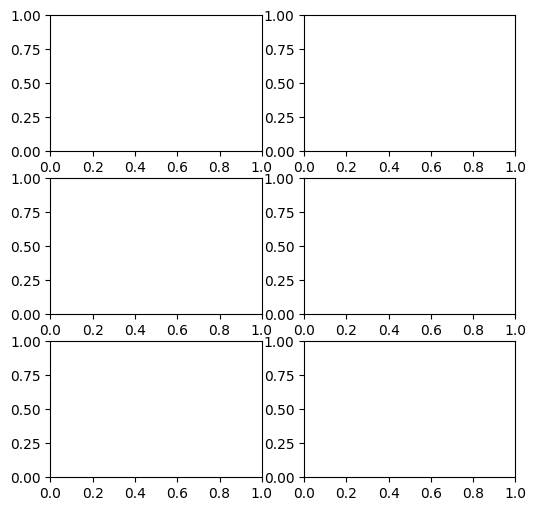

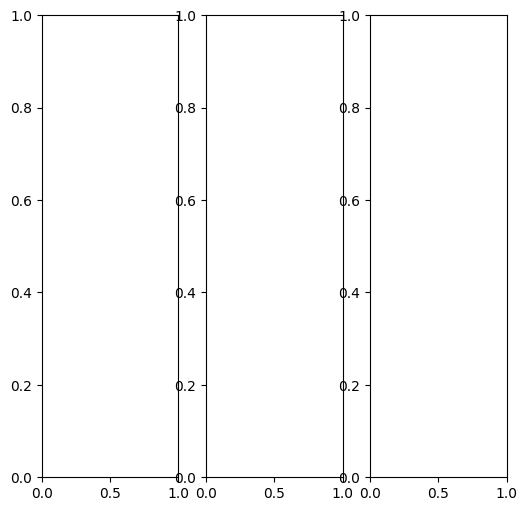

In [5]:
settings = (TestModel.ModelSettings(50, 64), TestModel.ModelSettings(50, 32), TestModel.ModelSettings(50, 16))
tm = TestModel(model_1, settings)
tm.test(X_train, X_train, val = (X_val, X_val), X_test=X_test, Y_test=Y_test)

## Model 2


In [6]:
def model_2():
    input_dim = 140
    encoding_dim = 20
    
    input_layer = layers.Input(shape = (input_dim, ))
    x = layers.Masking(0.)(input_layer)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    
    encoded = layers.Dense(encoding_dim, activation='relu')(x)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    encoder = models.Model(input_layer, encoded)
    autoencoder = models.Model(input_layer, decoded)
    
    return encoder, autoencoder

In [7]:
settings = (TestModel.ModelSettings(50, 64), TestModel.ModelSettings(50, 32), TestModel.ModelSettings(50, 16))
tm = TestModel(model_2, settings)
tm.test(X_train, X_train, val = (X_val, X_val), X_test=X_test, Y_test=Y_test)

# Model - 1
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
# Model - 2
Epoch 23/50 - loss: 4054.2532 - val_loss: 4030.7424

## Features

In [152]:
def get_features(path: str, encoder: models.Model):
    audio = Audio(path)
    _, _, stats = audio.get_mfcc()
    data = np.array(stats)
    data.shape
    data = data.reshape((1, 140))
    features_reduced = encoder.predict(data)
    features_reduced = features_reduced.flatten()
    features_reduced = min_max_scaling(features_reduced)
    return features_reduced

In [ ]:
fs = [
    get_features(r"D:\CODE\Project\Music_score\src\data\music\download\4n9Ie3ac6BM.mp3"),
    get_features(r"D:\CODE\Project\Music_score\src\data\music\download\eMp0OK1q7C0.mp3"),
    get_features(r"D:\CODE\Project\Music_score\src\data\music\download\xRJeEcby-Pw.mp3")
]
print([i.shape for i in fs])

In [ ]:
for i in fs:
    print(i)

In [ ]:
print(cosine_similarity(fs))